Found 1279 files belonging to 2 classes.
Using 1024 files for training.
Found 1279 files belonging to 2 classes.
Using 255 files for validation.
Found 1279 files belonging to 2 classes.
(1, 176, 208, 3)


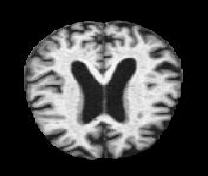

In [12]:
import numpy
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
import tensorflow as tf

import eli5
from keras_preprocessing.image import load_img

import my_utils
from Lime.Alzheimer_two_classes.data import load_data_alzheimer_two_classes

tf.compat.v1.disable_eager_execution()
import PIL
from PIL import Image
import requests
from io import BytesIO



# load the model
# model = Xception(weights='imagenet', include_top=True)
path_to_project = my_utils.path_to_project

BATCH_SIZE = 16
train_ds, val_ds, test_ds = load_data_alzheimer_two_classes()
model = tf.keras.models.load_model(my_utils.path_to_project + 'Models/my_alzheimer_model.h5')


# # chose the URL image that you want
# URL = "https://images.unsplash.com/photo-1529429617124-95b109e86bb8?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=500&amp;q=60"
# # get the image
# response = requests.get(URL)
# img = Image.open(BytesIO(response.content))
# # resize the image according to each model (see documentation of each model)
# img = img.resize((299, 299))
#
# # convert to numpy array
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
#
# print(x.shape)

IMG_WIDTH, IMG_HEIGHT = (176, 208)


def process_img(path):
    path_to_img_to_explain = path_to_project + path
    return image.img_to_array(load_img(path=path_to_img_to_explain,
                                       target_size=(IMG_WIDTH, IMG_HEIGHT))).astype('int32')



x = numpy.expand_dims(process_img("Datasets/Alzheimer_two_classes/test/Demented/26 (19).jpg"), axis=0)
x = preprocess_input(x)
print(x.shape)
features  = model.predict(x)


# return the top 20 detected objects
# label = decode_predictions(features, top=20)
#
# np.argsort(features)[0, ::-1][:10]

eli5.show_prediction(model, x, targets=[1])

# eli5.show_prediction(model, x, targets=[424])